In [135]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 10 21:55:44 2021

@author: User
"""


# numpy handles pretty much anything that is a number/vector/matrix/array
import numpy as np
# pandas handles dataframes (exactly the same as tables in Matlab)
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# stats models is a package that is going to perform the regression analysis
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools
import numpy

#import linear regressor model from sk learn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

















In [138]:

#extract data from csv 
data = pd.read_csv('/home/kaiyun/Dropbox/CAB420_Machine_Learning/Assignment_1A/420/420_A1/Assignment 1A/CAB420_Assessment_1A_Data/Data/Q1/communities.csv')
print(data.shape)
print("Data cleaning ---------------------------")
#clean data 
occurrences = np.count_nonzero(data == '?',axis = 0)
print(occurrences)
print(occurrences.shape)
#remove first 5 columns 
#print(data.columns)  
data.drop([" state ", " county "," community "," communityname string"," fold "], axis = 1, inplace = True)
#print(data)
#print(data.columns)  
#remove columns with missing data
#most sample didnt have values 1675 out of 1994
data.drop([" PolicBudgPerPop ", " LemasGangUnitDeploy "," LemasPctPolicOnPatr "," PolicOperBudg "," PolicCars "], axis = 1, inplace = True) 
data.drop([data.columns[112],data.columns[111],data.columns[110],data.columns[109],data.columns[108],data.columns[107],data.columns[106],data.columns[105],data.columns[104],data.columns[103],data.columns[102],data.columns[101],data.columns[100],data.columns[99],data.columns[98],data.columns[97],data.columns[96]], axis = 1, inplace = True) 
#print(data)
#print(data.columns)  
#remove row with missing value 

# Get indexes where name column has value ?
indexNames = data[data[' OtherPerCap '] == '?'].index
#print(indexNames)
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)


#check for no values 
occurrences = np.count_nonzero(data == '?',axis = 0)
#print(occurrences)
#print(occurrences.shape)
#standardization of inputs
pass # todo 
#get X and Y 
X = data.iloc[:, :100]
Y = data.iloc[:, 100:]
data_to_use = data.iloc[:,0:10].dropna()
#print(X.columns)
#print(Y.columns)
#print(X.shape)

#print(X)

#Standardised Data
#scaler = StandardScaler()
#X = scaler.fit_transform(X) 

#print(X)

#shuffle data
X, Y = shuffle(X, Y, random_state=None)

#splite data into testing/validation/training
X_train, X_remaining, Y_train, Y_remaining = train_test_split(X,Y, train_size = .6, random_state = 0)
X_test, X_valid, Y_test, Y_valid = train_test_split(X_remaining,Y_remaining, train_size = .5, random_state = 0)

#conver dp to numpy array 
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_valid = X_valid.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()
Y_valid = Y_valid.to_numpy()





(1994, 128)
Data cleaning ---------------------------
[   0 1174 1177    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    1    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 1675 1675 1675 1675 1675 1675 1675 1675 1675 1675 1675
 1675 1675 1675 1675 1675 1675    0    0    0 1675 1675 1675 1675    0
 1675    0]
(128,)


In [141]:
print(data_to_use.head(10))

    population    householdsize    racepctblack    racePctWhite   \
0          0.19             0.33            0.02            0.90   
1          0.00             0.16            0.12            0.74   
2          0.00             0.42            0.49            0.56   
3          0.04             0.77            1.00            0.08   
4          0.01             0.55            0.02            0.95   
5          0.02             0.28            0.06            0.54   
6          0.01             0.39            0.00            0.98   
7          0.01             0.74            0.03            0.46   
8          0.03             0.34            0.20            0.84   
9          0.01             0.40            0.06            0.87   

    racePctAsian    racePctHisp    agePct12t21    agePct12t29    agePct16t24   \
0            0.12           0.17           0.34           0.47           0.29   
1            0.45           0.07           0.26           0.59           0.35   
2       

In [144]:
#create linear regressor 
print("linear regressor ---------------------------")

clf = GridSearchCV(LinearRegression(),{
    'copy_X' : [True,False],
    'normalize' : [True,False],
    'fit_intercept' : [True,False],
    },cv = 4,return_train_score = False)
clf.fit(X_valid,Y_valid)
#print(clf.cv_results_)
print(clf.best_score_)
print(clf.best_params_)



LR = LinearRegression(copy_X= True, fit_intercept= False, normalize= True)
#{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'normalize': True}
LR.fit(X_train,Y_train)    

pred = LR.predict(X_test)

#get R2, adj R2,mean absoulte error 

# The coefficients
print('Coefficients: \n', LR.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(Y_test, pred))
# The coefficient of determination: 1 is perfect prediction
print('R2: %.2f' % r2_score(Y_test, pred))


linear regressor ---------------------------
0.5021631325896917
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
Coefficients: 
 [[ 4.08660295e-01 -8.02403694e-02  2.48721838e-01  2.37749224e-02
  -5.99329168e-03  1.23994053e-01  1.86763078e-01 -2.60372661e-01
  -1.86054725e-01  1.07787980e-01 -6.05086962e-01  5.18214957e-02
  -1.66053793e-01 -4.61898689e-02  5.20387382e-02 -2.13384770e-01
   1.53488606e-01  6.10588988e-02 -6.77985258e-02  3.01960930e-01
   1.05544668e-01 -3.31751265e-01 -2.18825433e-02 -1.76451527e-02
  -4.80722854e-03  3.73895841e-02  3.69365115e-02  3.40678949e-02
  -1.03680198e-01 -1.28880998e-01  1.13330612e-01  9.53459464e-02
   2.83950063e-02  2.73980339e-01 -5.81514151e-02  9.77261248e-03
  -1.08998872e-02 -1.16091915e-02  6.56931187e-01  3.08145943e-01
   3.69267995e-01 -8.53053111e-01 -2.41188781e-01  6.11929265e-02
  -8.90783258e-02 -3.61969597e-02  1.83888355e-02  5.47766411e-02
  -1.37340296e-01 -4.38415763e-02  1.81221693e-01 -1.38627122e-01
  

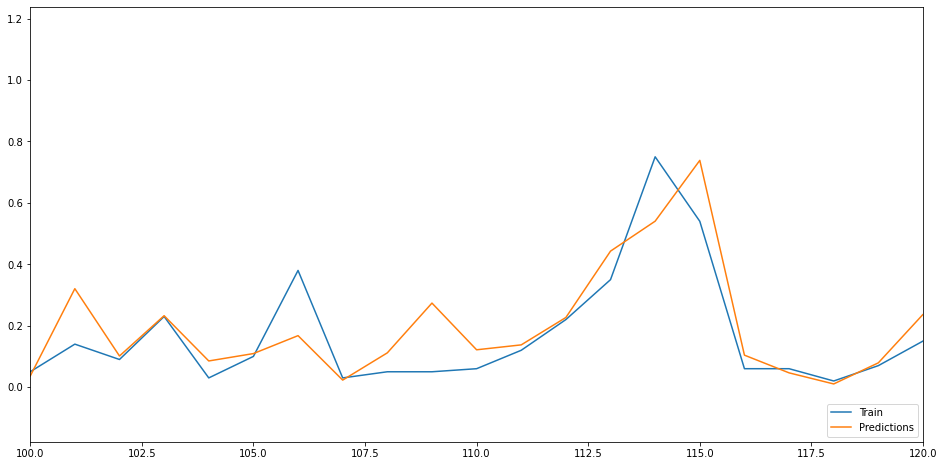

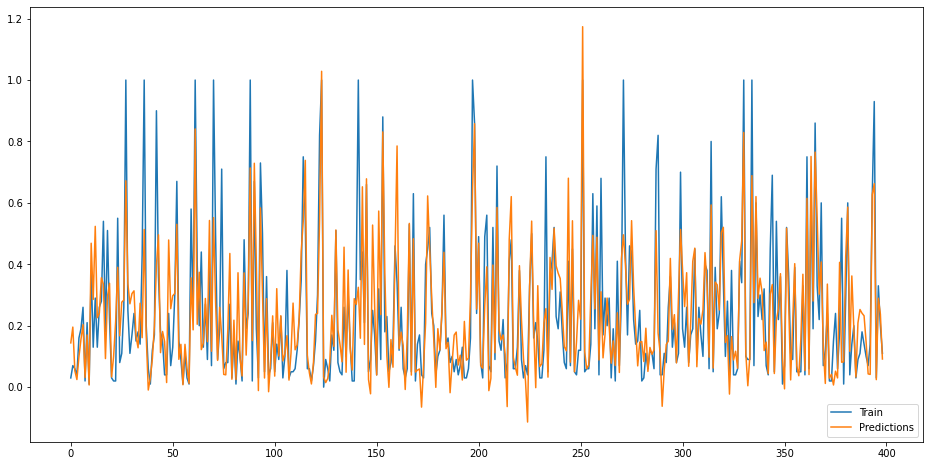

In [147]:
#visualise
plt.figure(figsize=(16,8))
plt.plot(Y_test)
plt.plot(pred)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.xlim((100,120))
plt.show()

plt.figure(figsize=(16,8))
plt.plot(Y_test)
plt.plot(pred)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.show()


In [149]:
print("Lasso---------------------------------")

clf = GridSearchCV(linear_model.Lasso(copy_X= True, fit_intercept= False, normalize= True),{
    'alpha' : [.0001,.0002,.0004,.0006,.0008,.002,.004,.006,.008,.01,.02,.04],
    },cv = 4,return_train_score = False)
clf.fit(X_valid,Y_valid)


#print(clf.cv_results_)
print(clf.best_score_)
print(clf.best_params_)

#create lasso regression model
LR_lasso = linear_model.Lasso(alpha=.002,copy_X= True, fit_intercept= False, normalize= True)
LR_lasso.fit(X_train,Y_train) 
pred_lasso = LR_lasso.predict(X_test)

#get R2, adj R2,mean absoulte error 

# The coefficients
print('Coefficients: \n', LR_lasso.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(Y_test, pred_lasso))
# The coefficient of determination: 1 is perfect prediction
print('R2: %.2f' % r2_score(Y_test, pred_lasso))
sum(LR_lasso.coef_ != 0)


Lasso---------------------------------
/home/kaiyun/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5631337430980468, tolerance: 0.003429540000000001
  model = cd_fast.enet_coordinate_descent(
/home/kaiyun/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8551293917681071, tolerance: 0.003346130000000001
  model = cd_fast.enet_coordinate_descent(
/home/kaiyun/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8375670671708617, tolerance: 0.003317380000000001
  model = cd_fast.enet_coordinate_descent(
/home/kaiyun/.local/lib/python3.8/site-pack

16

In [151]:
sum(LR_lasso.coef_ == 0)

84

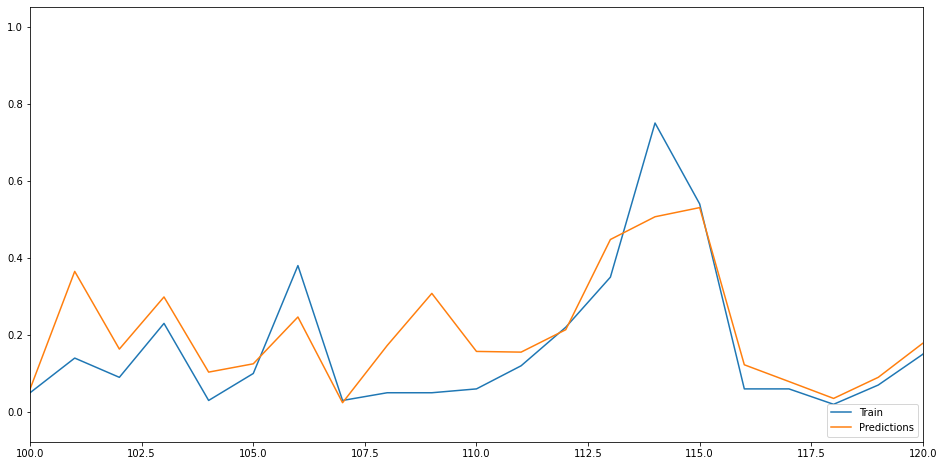

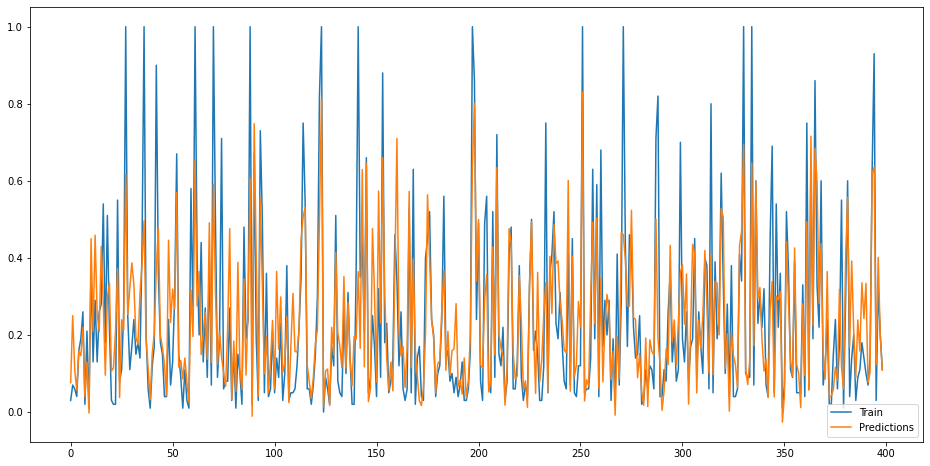

In [153]:

#visualise
plt.figure(figsize=(16,8))
plt.plot(Y_test)
plt.plot(pred_lasso)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.xlim((100,120))
plt.show()

plt.figure(figsize=(16,8))
plt.plot(Y_test)
plt.plot(pred_lasso)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.show()

<ipython-input-155-da69227a38bd>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  trained_model_lasso = Lasso(fit_intercept=False, alpha=l).fit(X_train, Y_train)
/home/kaiyun/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/kaiyun/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.520958092691428, tolerance: 0.012921259999999995
  model = cd_fast.enet_coordinate_descent(


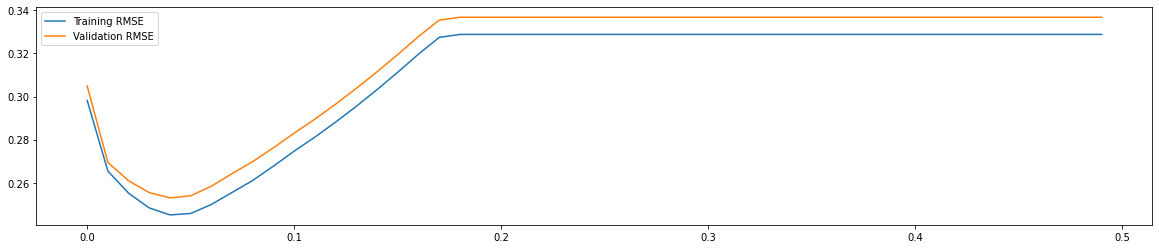

In [155]:
lambdas = numpy.arange(0.0, 0.5, 0.01)
rmse_train = []
rmse_validation = []
coeffs = []
for l in lambdas:
    trained_model_lasso = Lasso(fit_intercept=False, alpha=l).fit(X_train, Y_train)
    coeffs.append(trained_model_lasso.coef_)
    rmse_train.append(numpy.sqrt(numpy.mean((trained_model_lasso.predict(X_train) - Y_train)**2)))
    rmse_validation.append(numpy.sqrt(numpy.mean((trained_model_lasso.predict(X_valid) - Y_valid)**2)))
    
fig = plt.figure(figsize=[20, 4])
ax = fig.add_subplot(1, 1, 1)
ax.plot(lambdas, rmse_train, label='Training RMSE')
ax.plot(lambdas, rmse_validation, label='Validation RMSE')
ax.legend();

ValueError: x and y can be no greater than 2-D, but have shapes (500,) and (500, 1, 100)

In [148]:
best_lambda = lambdas[numpy.argmin(rmse_validation)]
print(best_lambda)

0.04


Mean squared error: 0.04
R2: 0.26


3

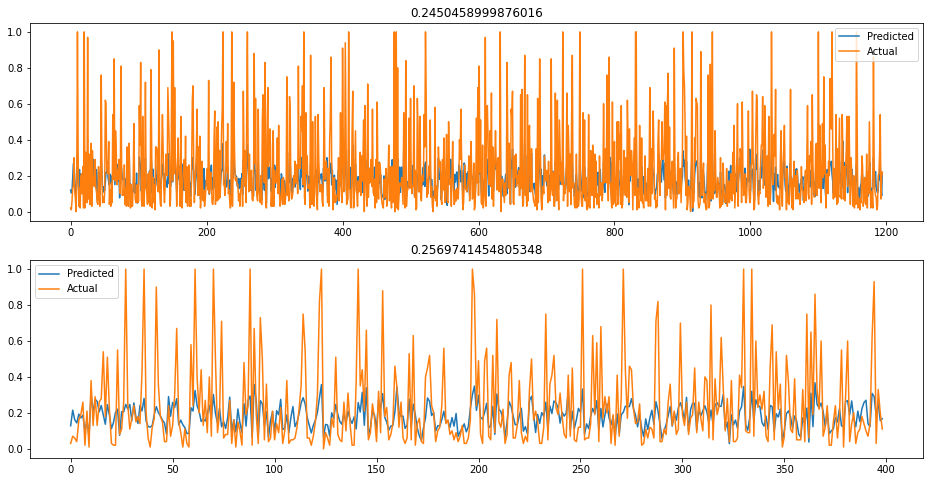

In [150]:
trained_model_lasso = Lasso(fit_intercept=False, alpha=best_lambda).fit(X_train, Y_train)

Y_train_pred = trained_model_lasso.predict(X_train)
Y_test_pred = trained_model_lasso.predict(X_test)
rmse_train = np.sqrt(np.mean((Y_train_pred - Y_train)**2))
rmse_test = np.sqrt(np.mean((Y_test_pred - Y_test)**2))



fig = plt.figure(figsize=[16, 8])
ax = fig.add_subplot(2, 1, 1)
ax.plot(np.arange(len(Y_train_pred)), Y_train_pred, label='Predicted')
ax.plot(np.arange(len(Y_train_pred)), Y_train, label='Actual')
ax.set_title(rmse_train)
ax.legend()
ax = fig.add_subplot(2, 1, 2)
ax.plot(np.arange(len(Y_test_pred)), Y_test_pred, label='Predicted')
ax.plot(np.arange(len(Y_test_pred)), Y_test, label='Actual')
ax.set_title(rmse_test)
ax.legend()

print('Mean squared error: %.2f'% mean_squared_error(Y_test, Y_test_pred))
# The coefficient of determination: 1 is perfect prediction
print('R2: %.2f' % r2_score(Y_test, Y_test_pred))

sum(trained_model_lasso.coef_ != 0)

In [152]:
print("Ridge---------------------------")





Ridge---------------------------


In [154]:

poly_transform = PolynomialFeatures(4)
X_poly = poly_transform.fit_transform(data_to_use.iloc[:,1:-1])
print(X_poly.shape)


(1993, 495)


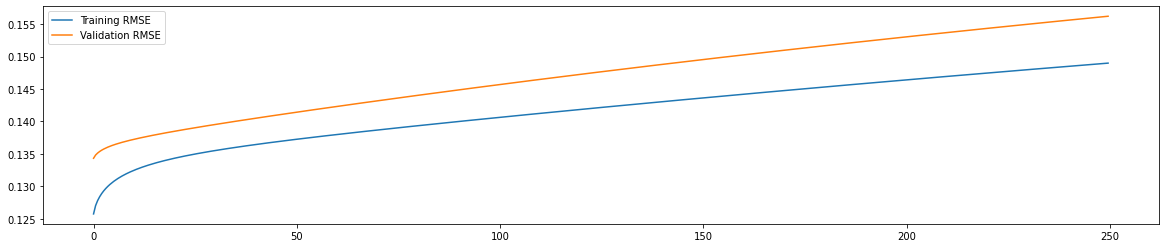

In [156]:
lambdas = np.arange(0, 250, 0.5)
rmse_train = []
rmse_validation = []
coeffs = []
for l in lambdas:
    trained_model_ridge = Ridge(fit_intercept=False, alpha=l).fit(X_train, Y_train)
    coeffs.append(trained_model_ridge.coef_)
    rmse_train.append(np.sqrt(np.mean((trained_model_ridge.predict(X_train) - Y_train)**2)))
    rmse_validation.append(np.sqrt(np.mean((trained_model_ridge.predict(X_valid) - Y_valid)**2)))
    
fig = plt.figure(figsize=[20, 4])
ax = fig.add_subplot(1, 1, 1)
ax.plot(lambdas, rmse_train, label='Training RMSE')
ax.plot(lambdas, rmse_validation, label='Validation RMSE')
ax.legend();

7.5
Coefficients: 
 [[ 0.00937903  0.03239835  0.14956845 -0.07380895 -0.01348313  0.02594204
  -0.01262097 -0.01152942 -0.00118027  0.04880637  0.00659151  0.0347933
   0.00736041 -0.01411224  0.01509117 -0.06276767  0.05666835  0.06107661
  -0.01826838 -0.00649756 -0.00110152 -0.01420404 -0.01730992 -0.0172227
   0.02581142  0.03340145  0.01622471 -0.00282304 -0.01467074 -0.02954589
   0.02774396  0.00788182 -0.04016917  0.04857537 -0.02651633  0.00050023
   0.0192386   0.00421031  0.08843998  0.06338501  0.06383971  0.07440411
   0.02390806 -0.02553219 -0.05624553 -0.02079083 -0.03183525 -0.00386571
  -0.03281311  0.00257278  0.13433593  0.01301182 -0.00475997 -0.0157319
  -0.02381523  0.01975496  0.0120064   0.0229501   0.02766867  0.03748683
   0.04927502  0.00393498 -0.00538671 -0.0124018   0.03766854 -0.01429189
   0.02799245 -0.01642559  0.05941882  0.04204779  0.0240182   0.05275334
  -0.05910378  0.01329178  0.03958949 -0.01730704  0.01540035  0.00513892
   0.00673858 -0.0298

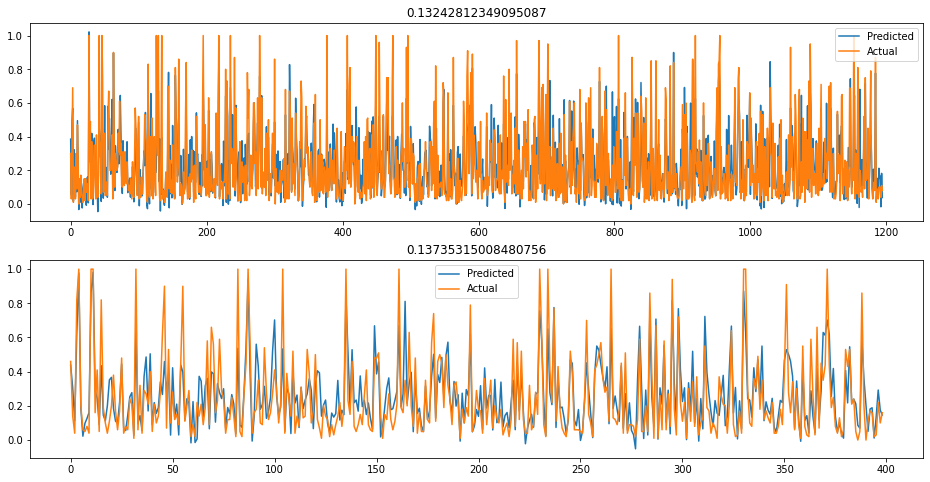

In [137]:
best_lambda = lambdas[numpy.argmin(rmse_validation)]
print(best_lambda)
trained_model_ridge = Ridge(fit_intercept=False, alpha=best_lambda).fit(X_train, Y_train)

Y_train_pred = trained_model_ridge.predict(X_train)
Y_test_pred = trained_model_ridge.predict(X_test)
rmse_train = np.sqrt(np.mean((Y_train_pred - Y_train)**2))
rmse_test = np.sqrt(np.mean((Y_test_pred - Y_test)**2))

fig = plt.figure(figsize=[16, 8])
ax = fig.add_subplot(2, 1, 1)
ax.plot(np.arange(len(Y_train_pred)), Y_train_pred, label='Predicted')
ax.plot(np.arange(len(Y_train_pred)), Y_train, label='Actual')
ax.set_title(rmse_train)
ax.legend()
ax = fig.add_subplot(2, 1, 2)
ax.plot(np.arange(len(Y_test_pred)), Y_test_pred, label='Predicted')
ax.plot(np.arange(len(Y_test_pred)), Y_test, label='Actual')
ax.set_title(rmse_test)
ax.legend()

#get R2, adj R2,mean absoulte error 

# The coefficients
print('Coefficients: \n', trained_model_ridge.coef_)
print('Mean squared error: %.2f'% mean_squared_error(Y_test, Y_test_pred))
# The coefficient of determination: 1 is perfect prediction
print('R2: %.2f' % r2_score(Y_test, Y_test_pred))

Mean squared error: 0.02
R2: 0.67


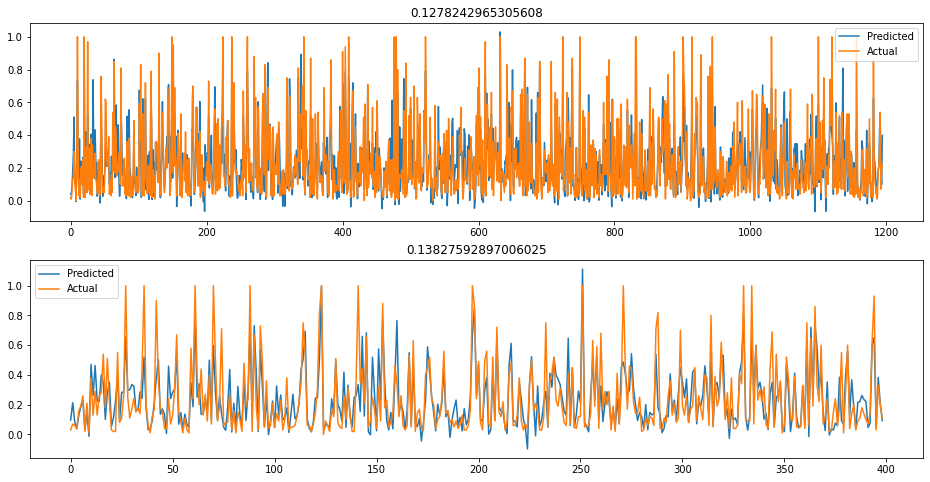

In [140]:
trained_model_ridge = Ridge(fit_intercept=False, alpha=1).fit(X = X_train, y = Y_train)

Y_train_pred = trained_model_ridge.predict(X_train)
Y_test_pred = trained_model_ridge.predict(X_test)
rmse_train = np.sqrt(np.mean((Y_train_pred - Y_train)**2))
rmse_test = np.sqrt(np.mean((Y_test_pred - Y_test)**2))

fig = plt.figure(figsize=[16, 8])
ax = fig.add_subplot(2, 1, 1)
ax.plot(np.arange(len(Y_train_pred)), Y_train_pred, label='Predicted')
ax.plot(np.arange(len(Y_train_pred)), Y_train, label='Actual')
ax.set_title(rmse_train)
ax.legend()
ax = fig.add_subplot(2, 1, 2)
ax.plot(np.arange(len(Y_test_pred)), Y_test_pred, label='Predicted')
ax.plot(np.arange(len(Y_test_pred)), Y_test, label='Actual')
ax.set_title(rmse_test)
ax.legend()
print('Mean squared error: %.2f'% mean_squared_error(Y_test, Y_test_pred))
# The coefficient of determination: 1 is perfect prediction
print('R2: %.2f' % r2_score(Y_test, Y_test_pred))

In [143]:
clf = GridSearchCV(linear_model.Ridge(copy_X= True, fit_intercept= False, normalize= True),{
    'alpha' : [1,5,10,15,20,25,30,35,40,45,50,55,60],
    },cv = 4,return_train_score = False)
clf.fit(X_valid,Y_valid)


#print(clf.cv_results_)
print(clf.best_score_)
print(clf.best_params_)

#create ridge regression model
LR_Ridge = linear_model.Ridge(alpha=15)
LR_Ridge.fit(X_train,Y_train) 
pred_Ridge = LR_Ridge.predict(X_test)
#get R2, adj R2,mean absoulte error 

# The coefficients
print('Coefficients: \n', LR_Ridge.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(Y_test, pred_Ridge))
# The coefficient of determination: 1 is perfect prediction
print('R2: %.2f' % r2_score(Y_test, pred_Ridge))


0.658018941772295
{'alpha': 5}
Coefficients: 
 [[ 0.00124433 -0.00115952  0.11883029 -0.07272216 -0.0217489   0.01013574
  -0.01491376 -0.03614735 -0.02151927  0.01749132 -0.00111578  0.03295064
   0.00459374 -0.01522653  0.01101213 -0.06300272  0.00902898  0.02409846
  -0.03885018 -0.00206555 -0.00020798  0.00212407 -0.01588779 -0.01120162
   0.00268196  0.03082517  0.01549162  0.01228937 -0.01659597 -0.02393661
   0.01827034 -0.01284727 -0.00068021  0.00731376 -0.03210285 -0.00822892
  -0.00429477 -0.01623556  0.06467968  0.03396261  0.01865276  0.03657763
   0.01102661 -0.04979159 -0.06658103 -0.05935573 -0.04090644 -0.00272994
  -0.02411001  0.01771165  0.11964347  0.00271348 -0.001439   -0.00744957
   0.00449312  0.00715351  0.01259543  0.00969714  0.02042696  0.02007584
   0.00512851 -0.01931877  0.01220213  0.00648106  0.01711804 -0.012316
   0.00611459 -0.0127812   0.04038178  0.00648068 -0.00161195  0.0442948
  -0.05275118  0.00507717  0.07737971 -0.0338195   0.00416923  0.028

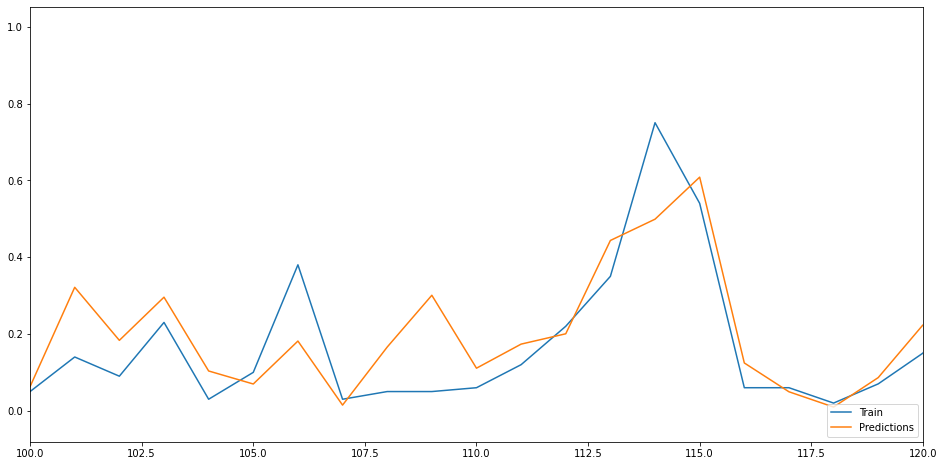

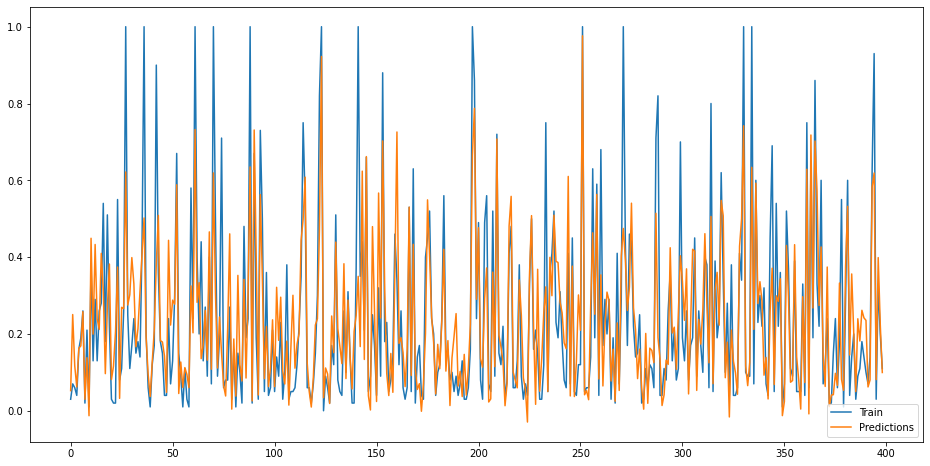

In [146]:
#visualise
plt.figure(figsize=(16,8))
plt.plot(Y_test)
plt.plot(pred_Ridge)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.xlim((100,120))
plt.show()



plt.figure(figsize=(16,8))
plt.plot(Y_test)
plt.plot(pred_Ridge)
plt.legend(['Train','Predictions'],loc='lower right')
#plt.title('Linear Regression Model - T1v1 - Trained on 50%')
#plt.xlabel("Samples")
#plt.ylabel("Resistance (KN) ")
plt.show()

#select lambda

#

pass 
